In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from scipy.stats import mode
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
plt.style.use("ggplot")
import re
import lightgbm as lgbm

In [103]:
train_df = pd.read_csv('../Data/multi-label-classification-data/train.csv')
test_df = pd.read_csv('../Data/multi-label-classification-data/test.csv')
submission = pd.read_csv('../Data/multi-label-classification-data/sample_submission.csv')

In [104]:
def data_hist(df, col, row, n):
    plt.figure(figsize=(20, 20))
    cols = df.columns
    for i in range(len(cols)):
        plt.subplot(col, row, i+1)
        plt.title(cols[i], fontsize=20)
        if len(df[cols[i]].unique()) > n:
            plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        else:
            temp = df[cols[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

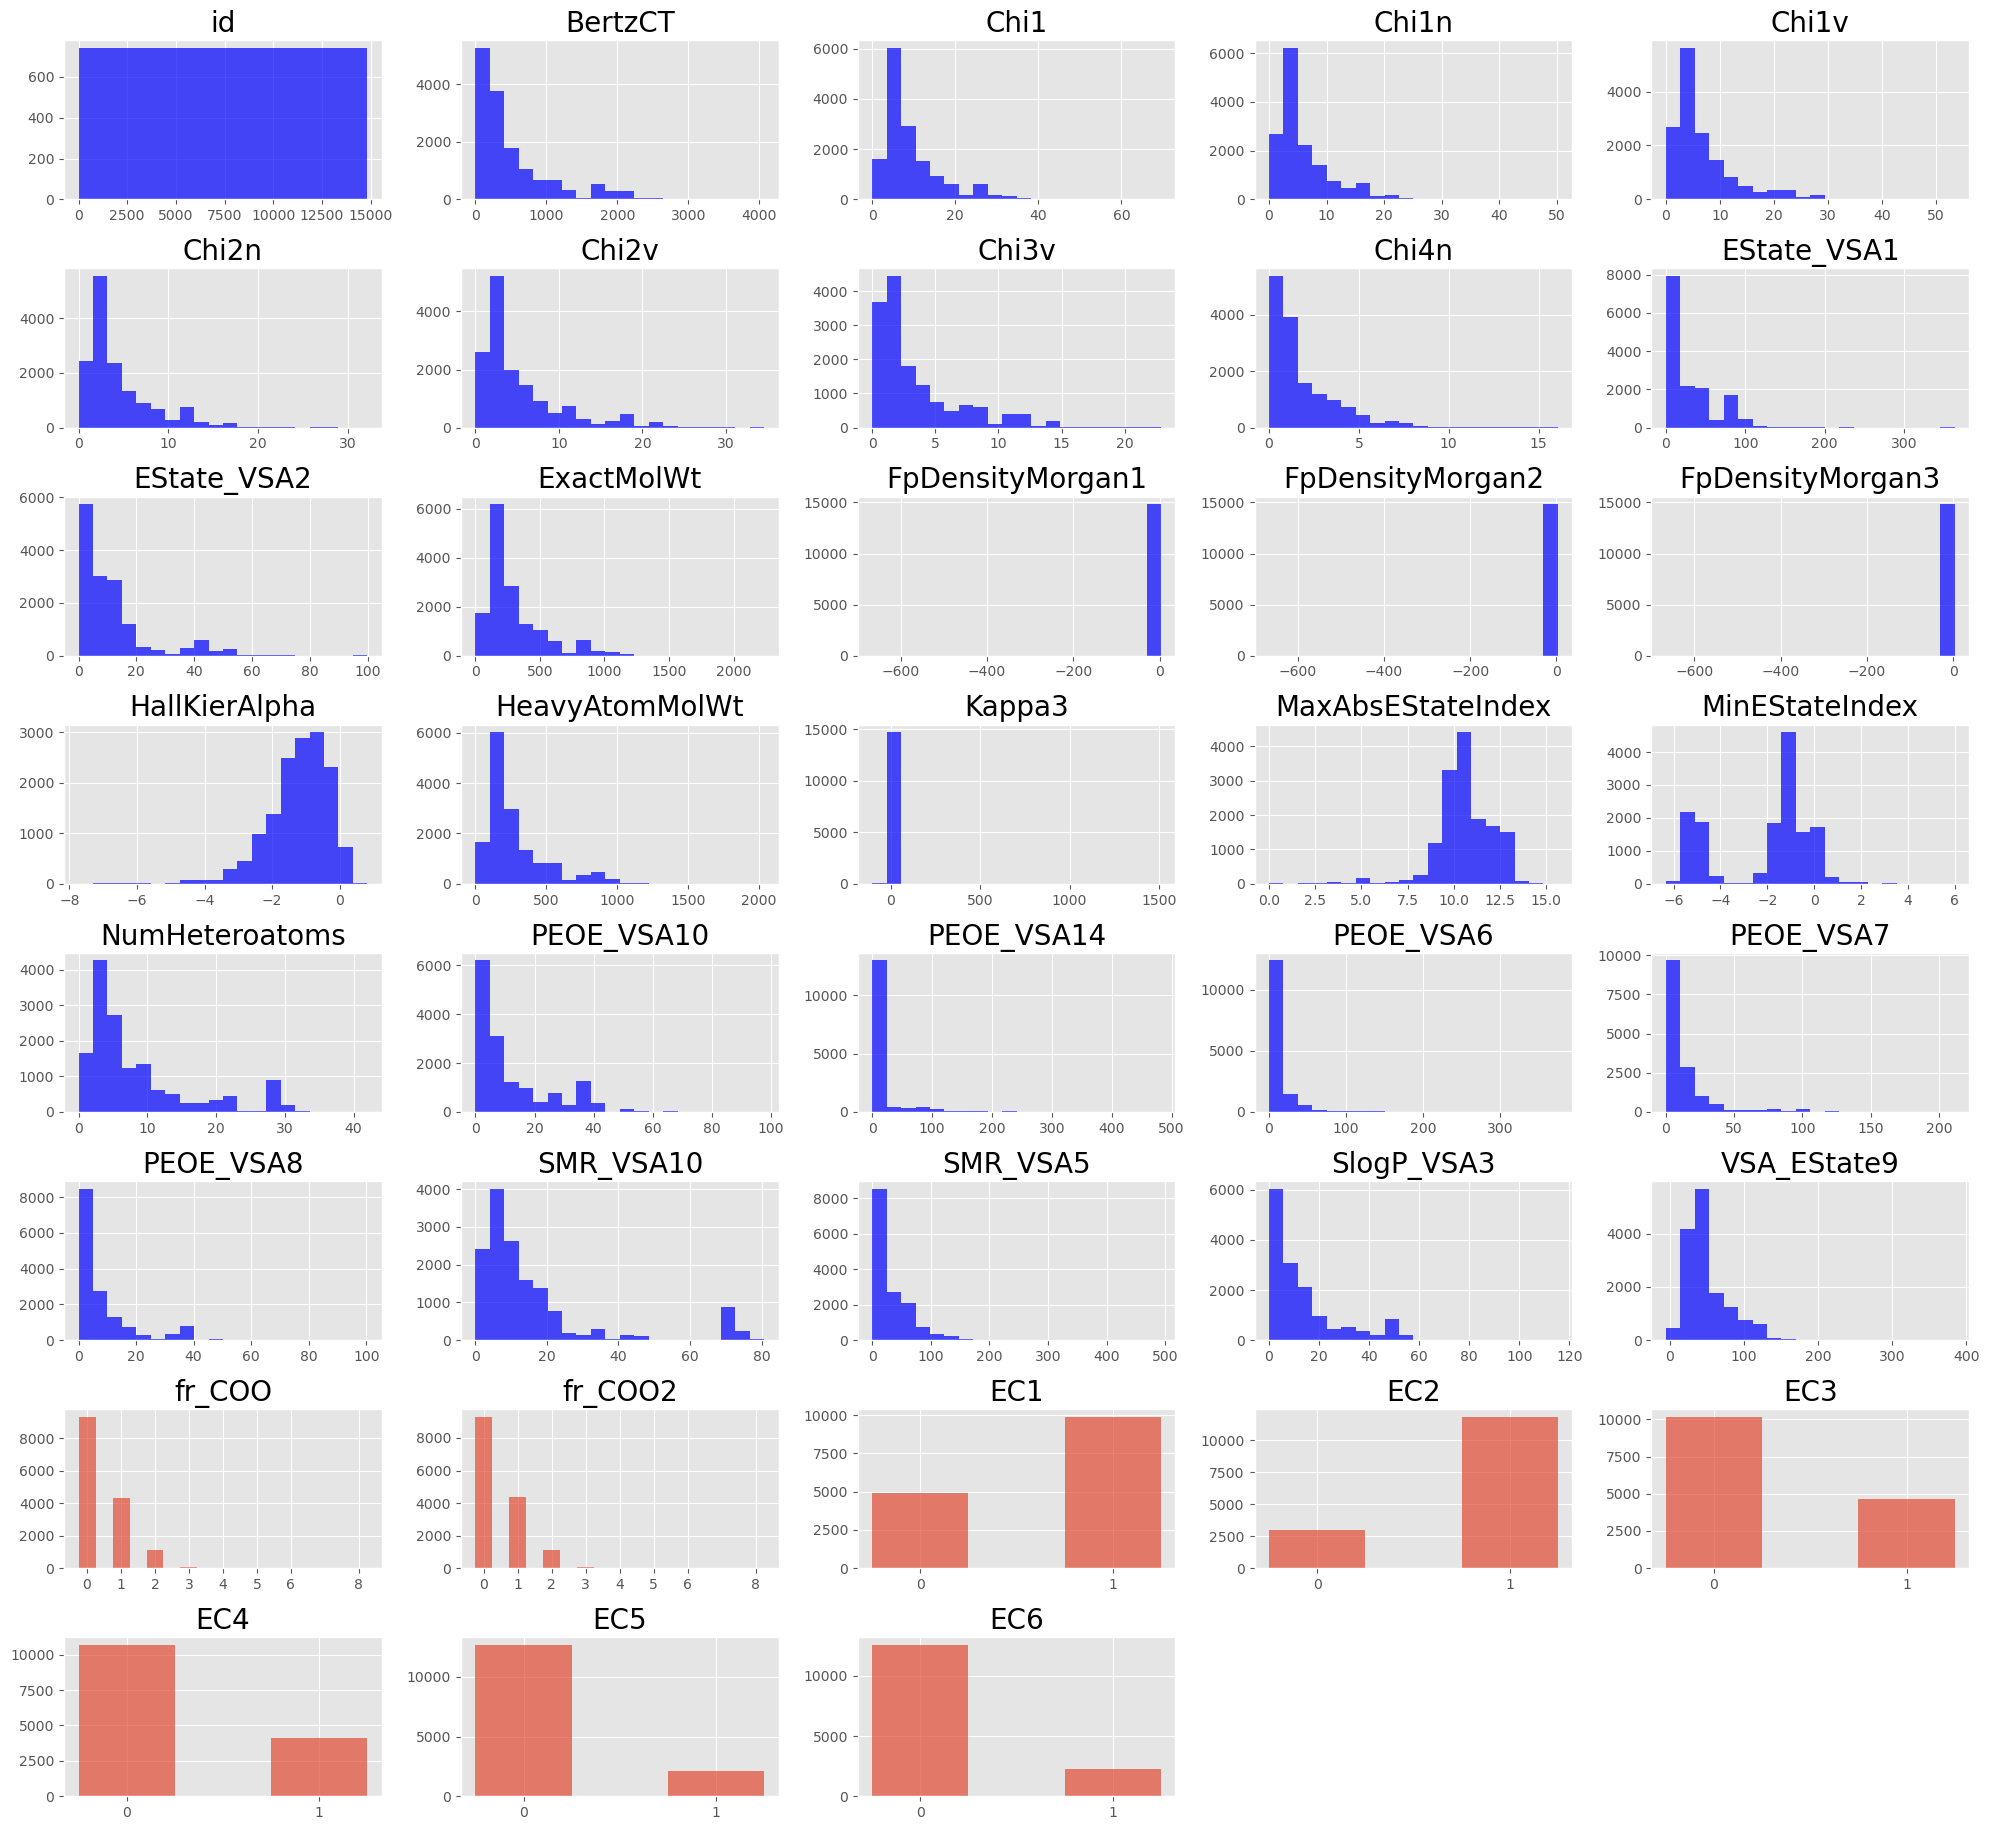

In [105]:
data_hist(train_df, 8, 5, 20)

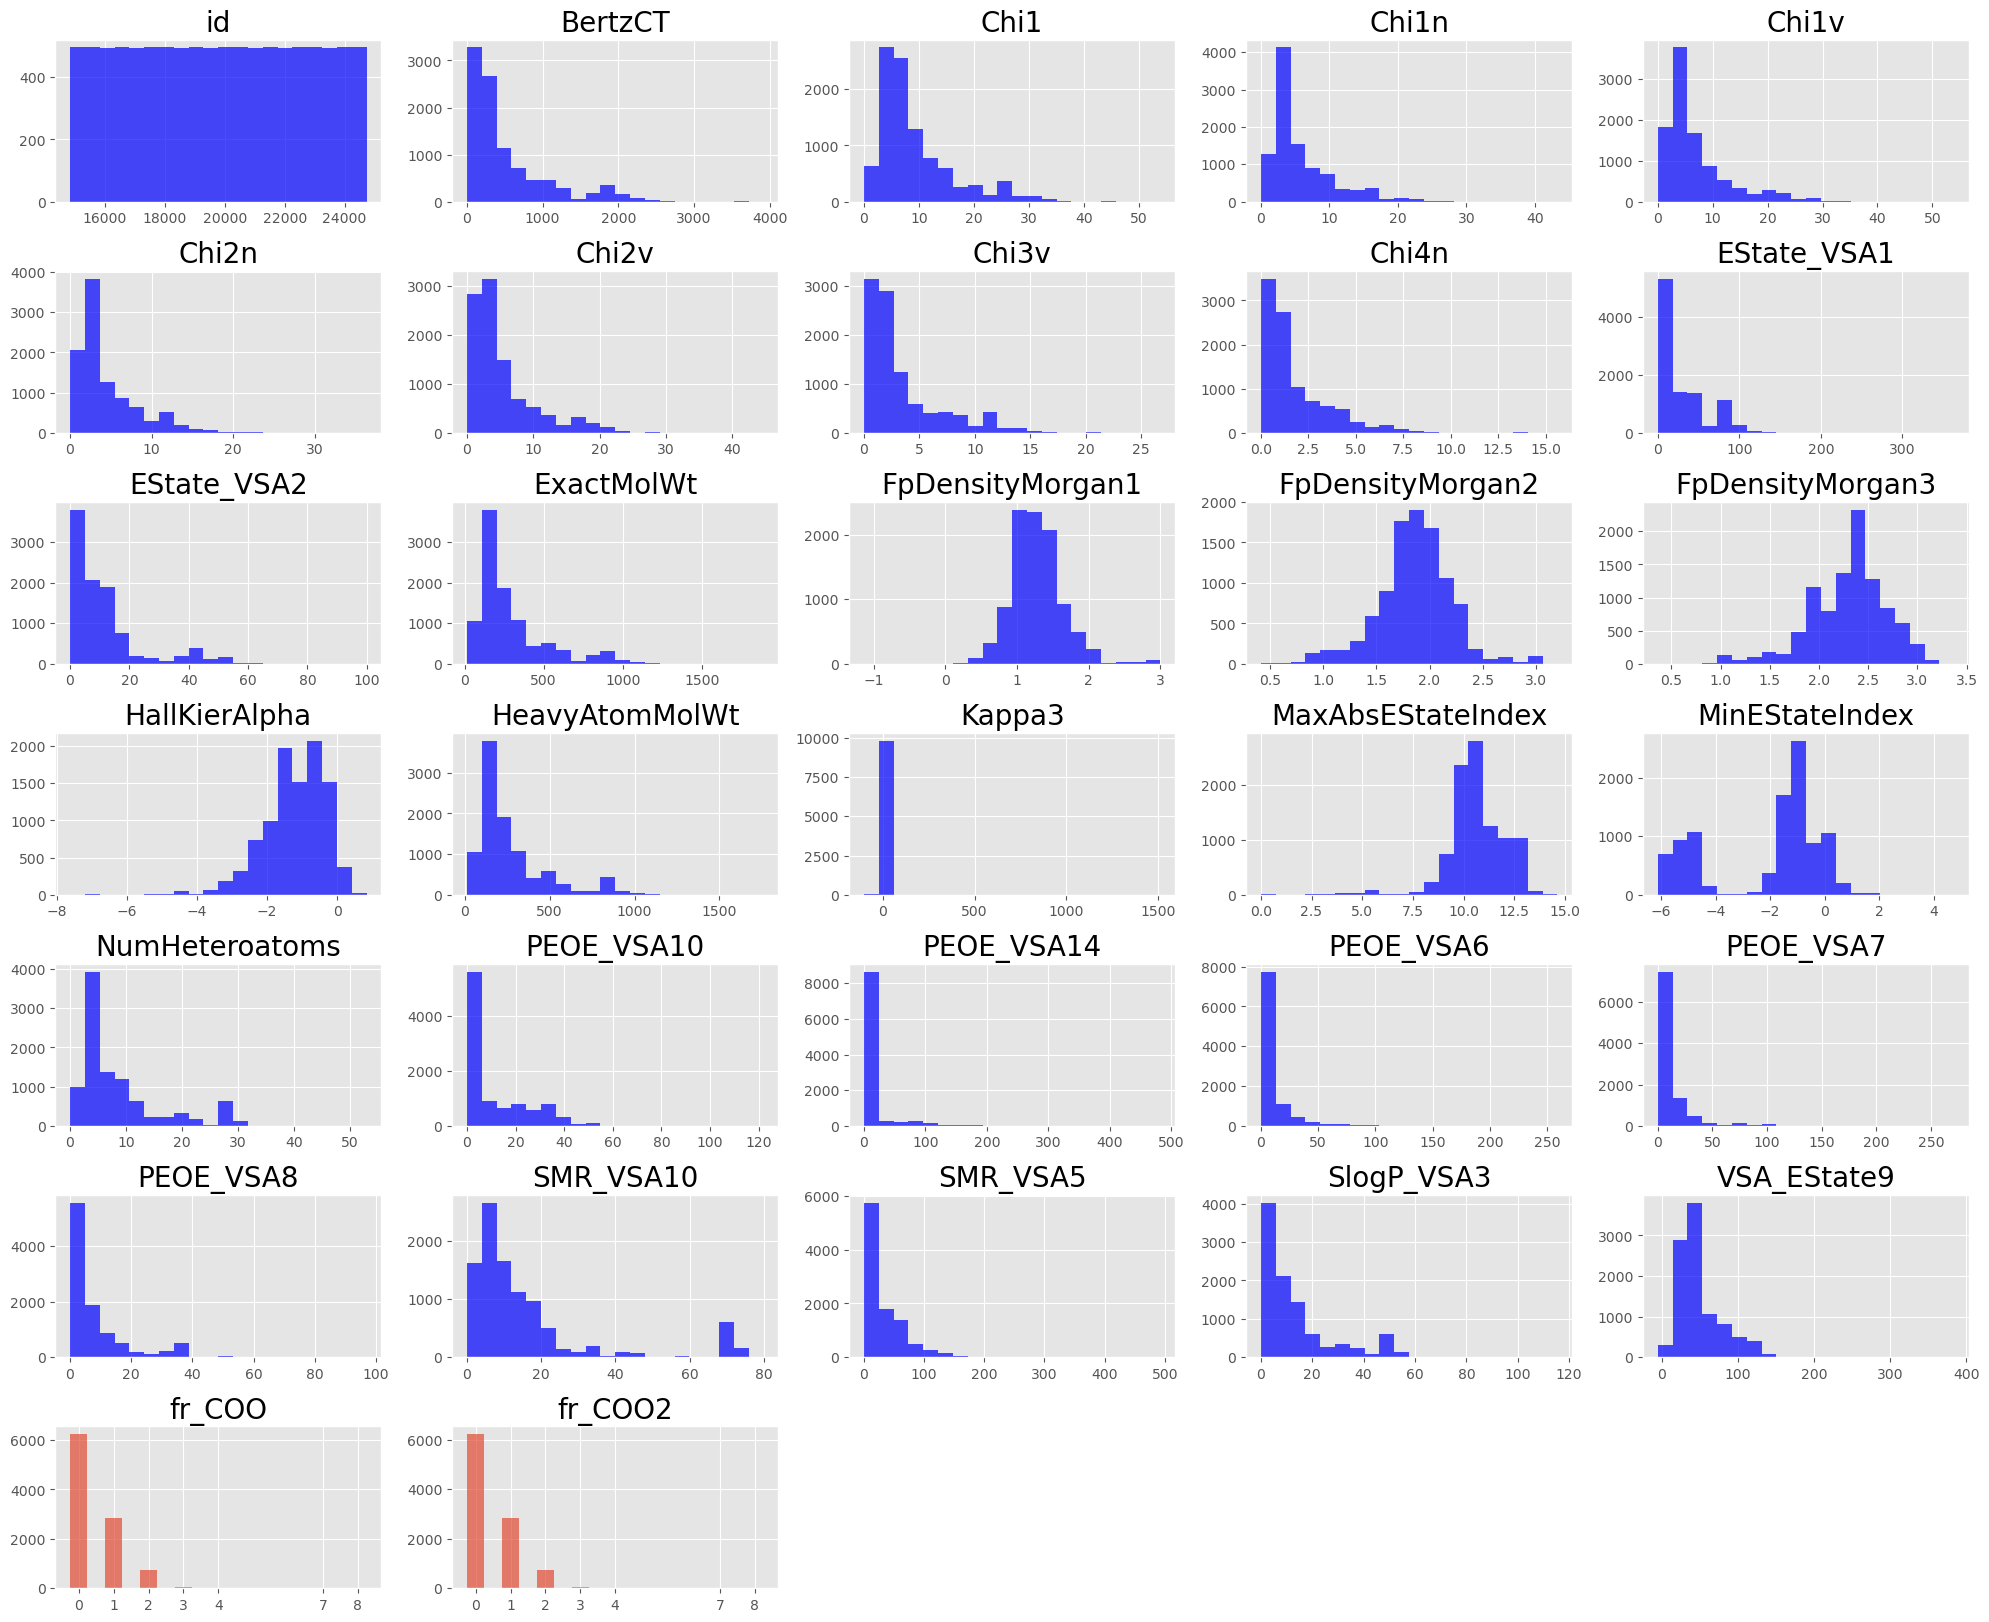

In [106]:
data_hist(test_df, 8, 5, 20)

In [107]:
train_df.shape

(14838, 38)

In [108]:
test_df.shape

(9893, 32)

In [118]:
model_1 = lgbm.Booster(model_file="model02_EC1")

In [ ]:
import eli5

In [109]:
label_df = train_df[['EC1','EC2','EC3','EC4','EC5','EC6']]

In [110]:
label_df.to_csv('../Data/multi-label-classification-data/label.csv', index=False)

In [111]:
train_df_no = train_df.drop(['EC1','EC2','EC3','EC4','EC5','EC6'], axis=1)
train_df_no.to_csv('../Data/multi-label-classification-data/train_process.csv', index=False)

<Axes: >

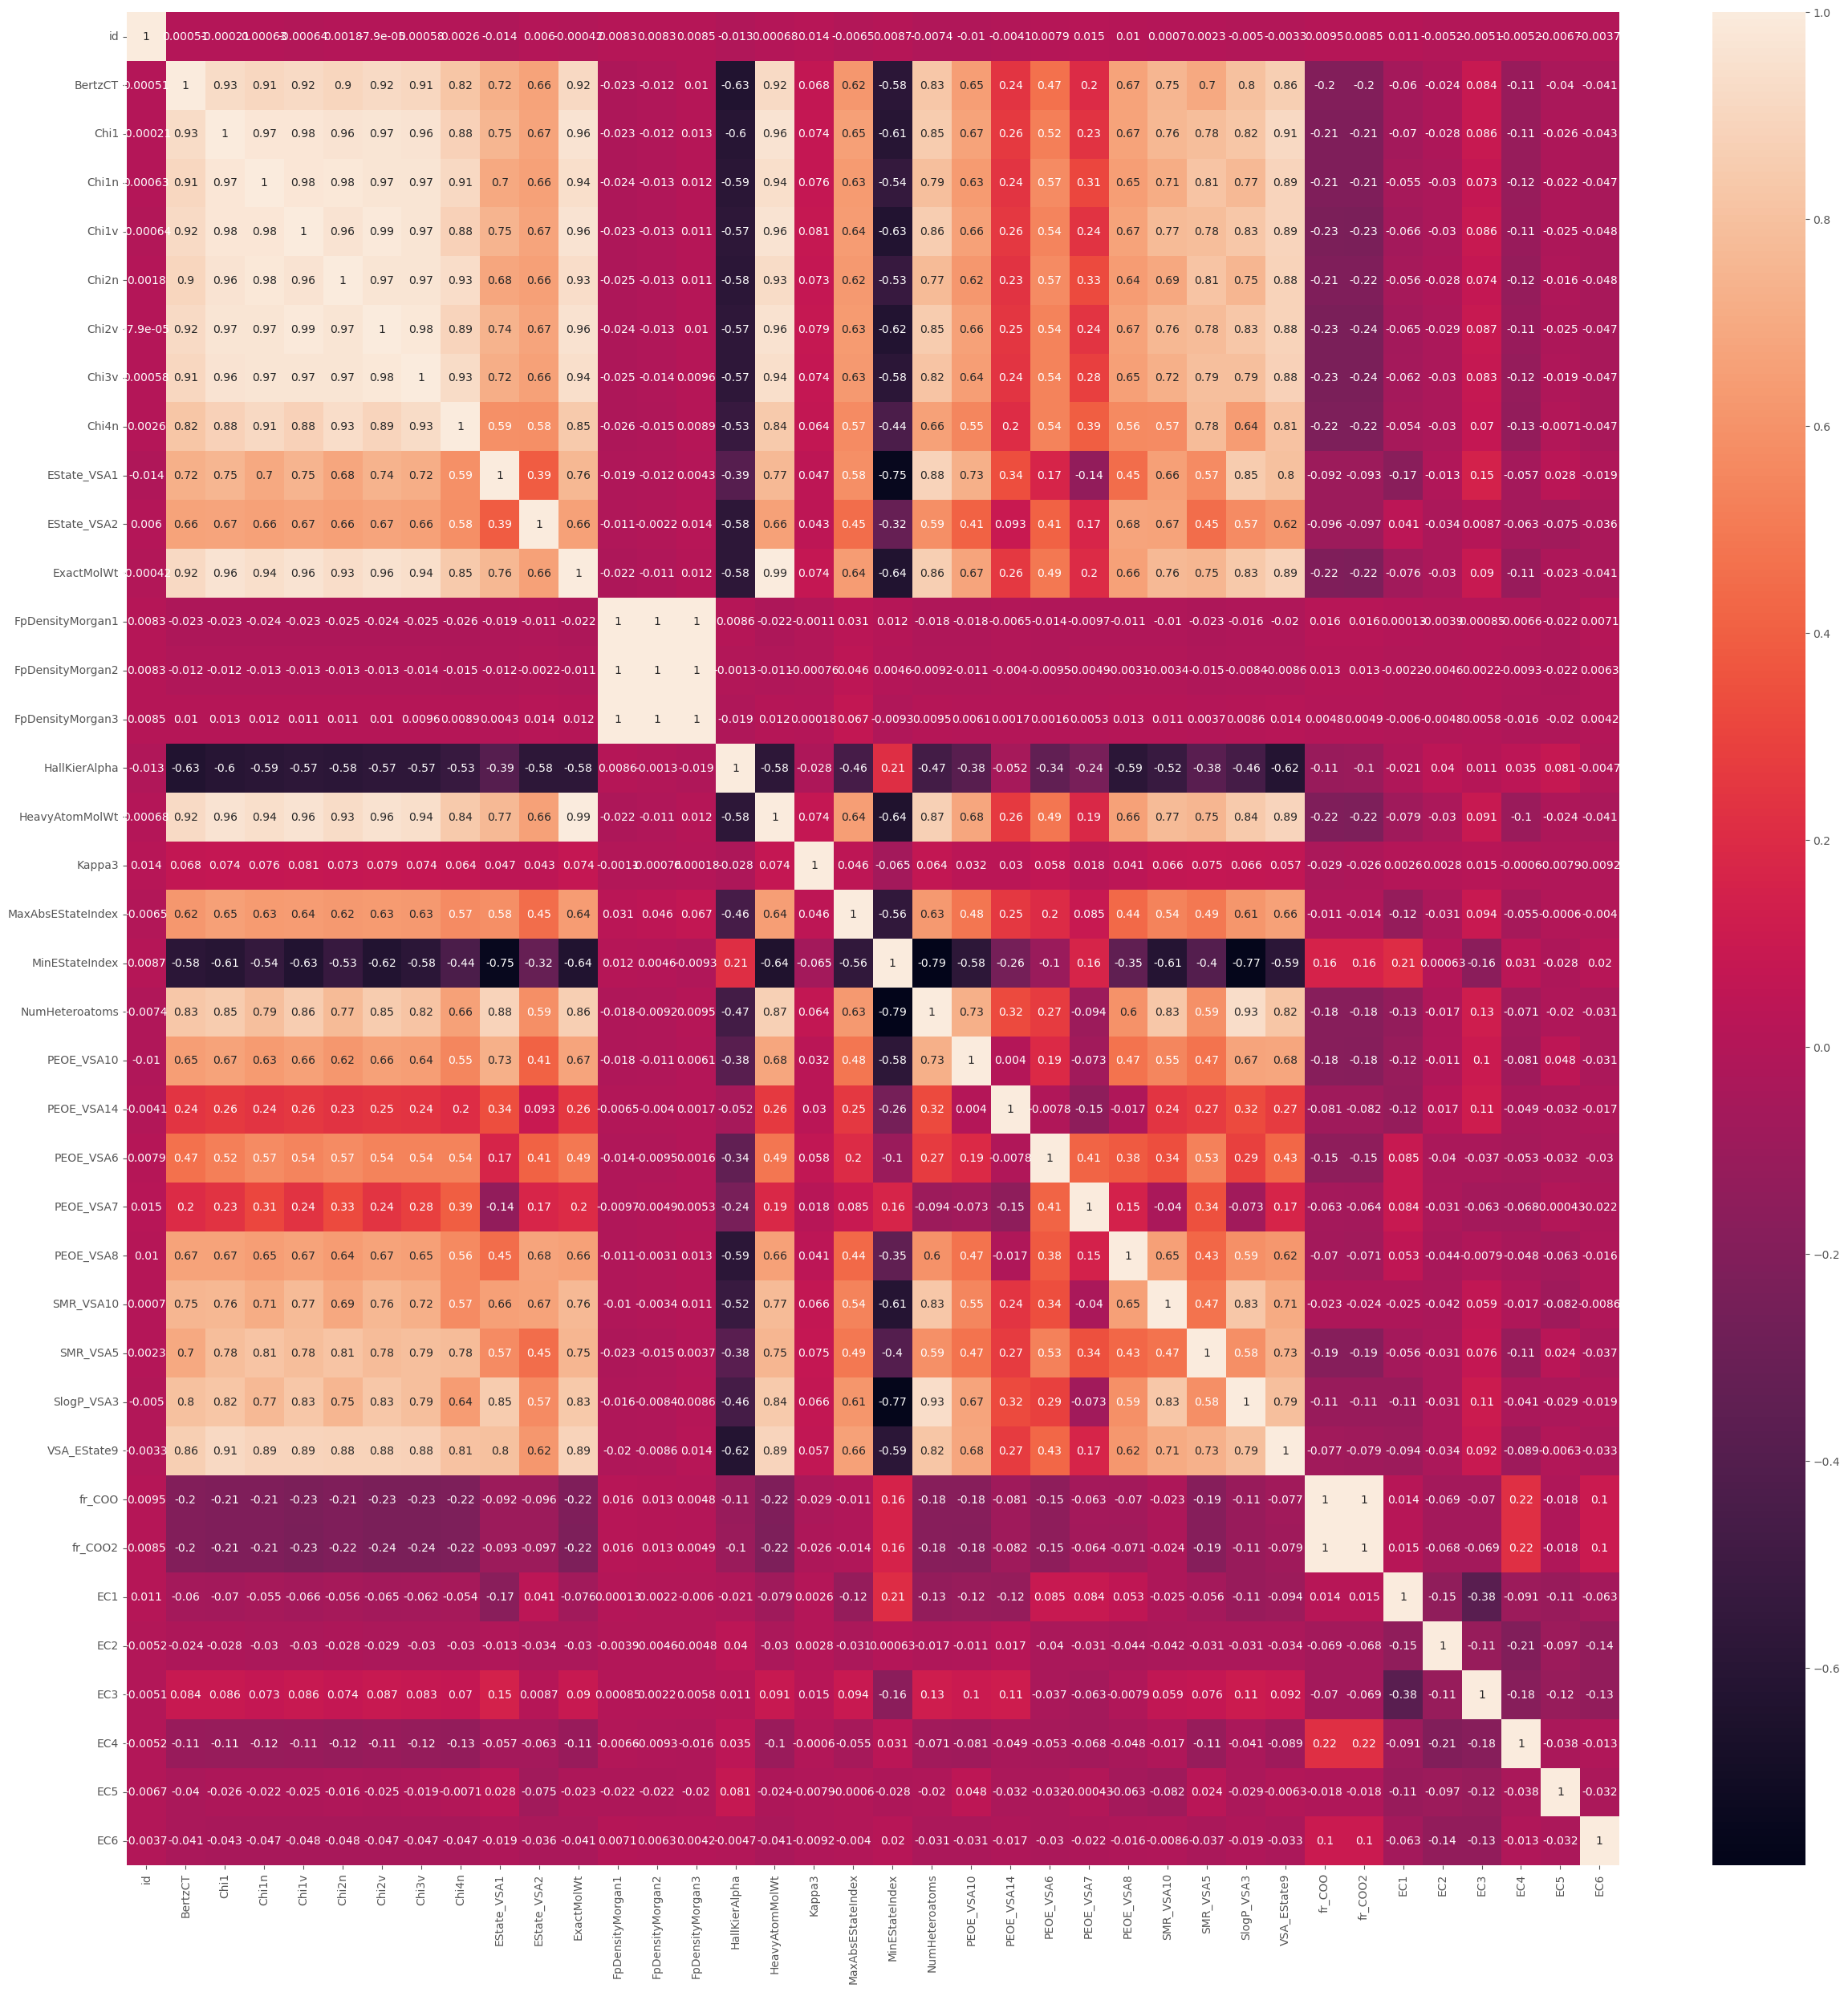

In [112]:

plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(), annot=True)


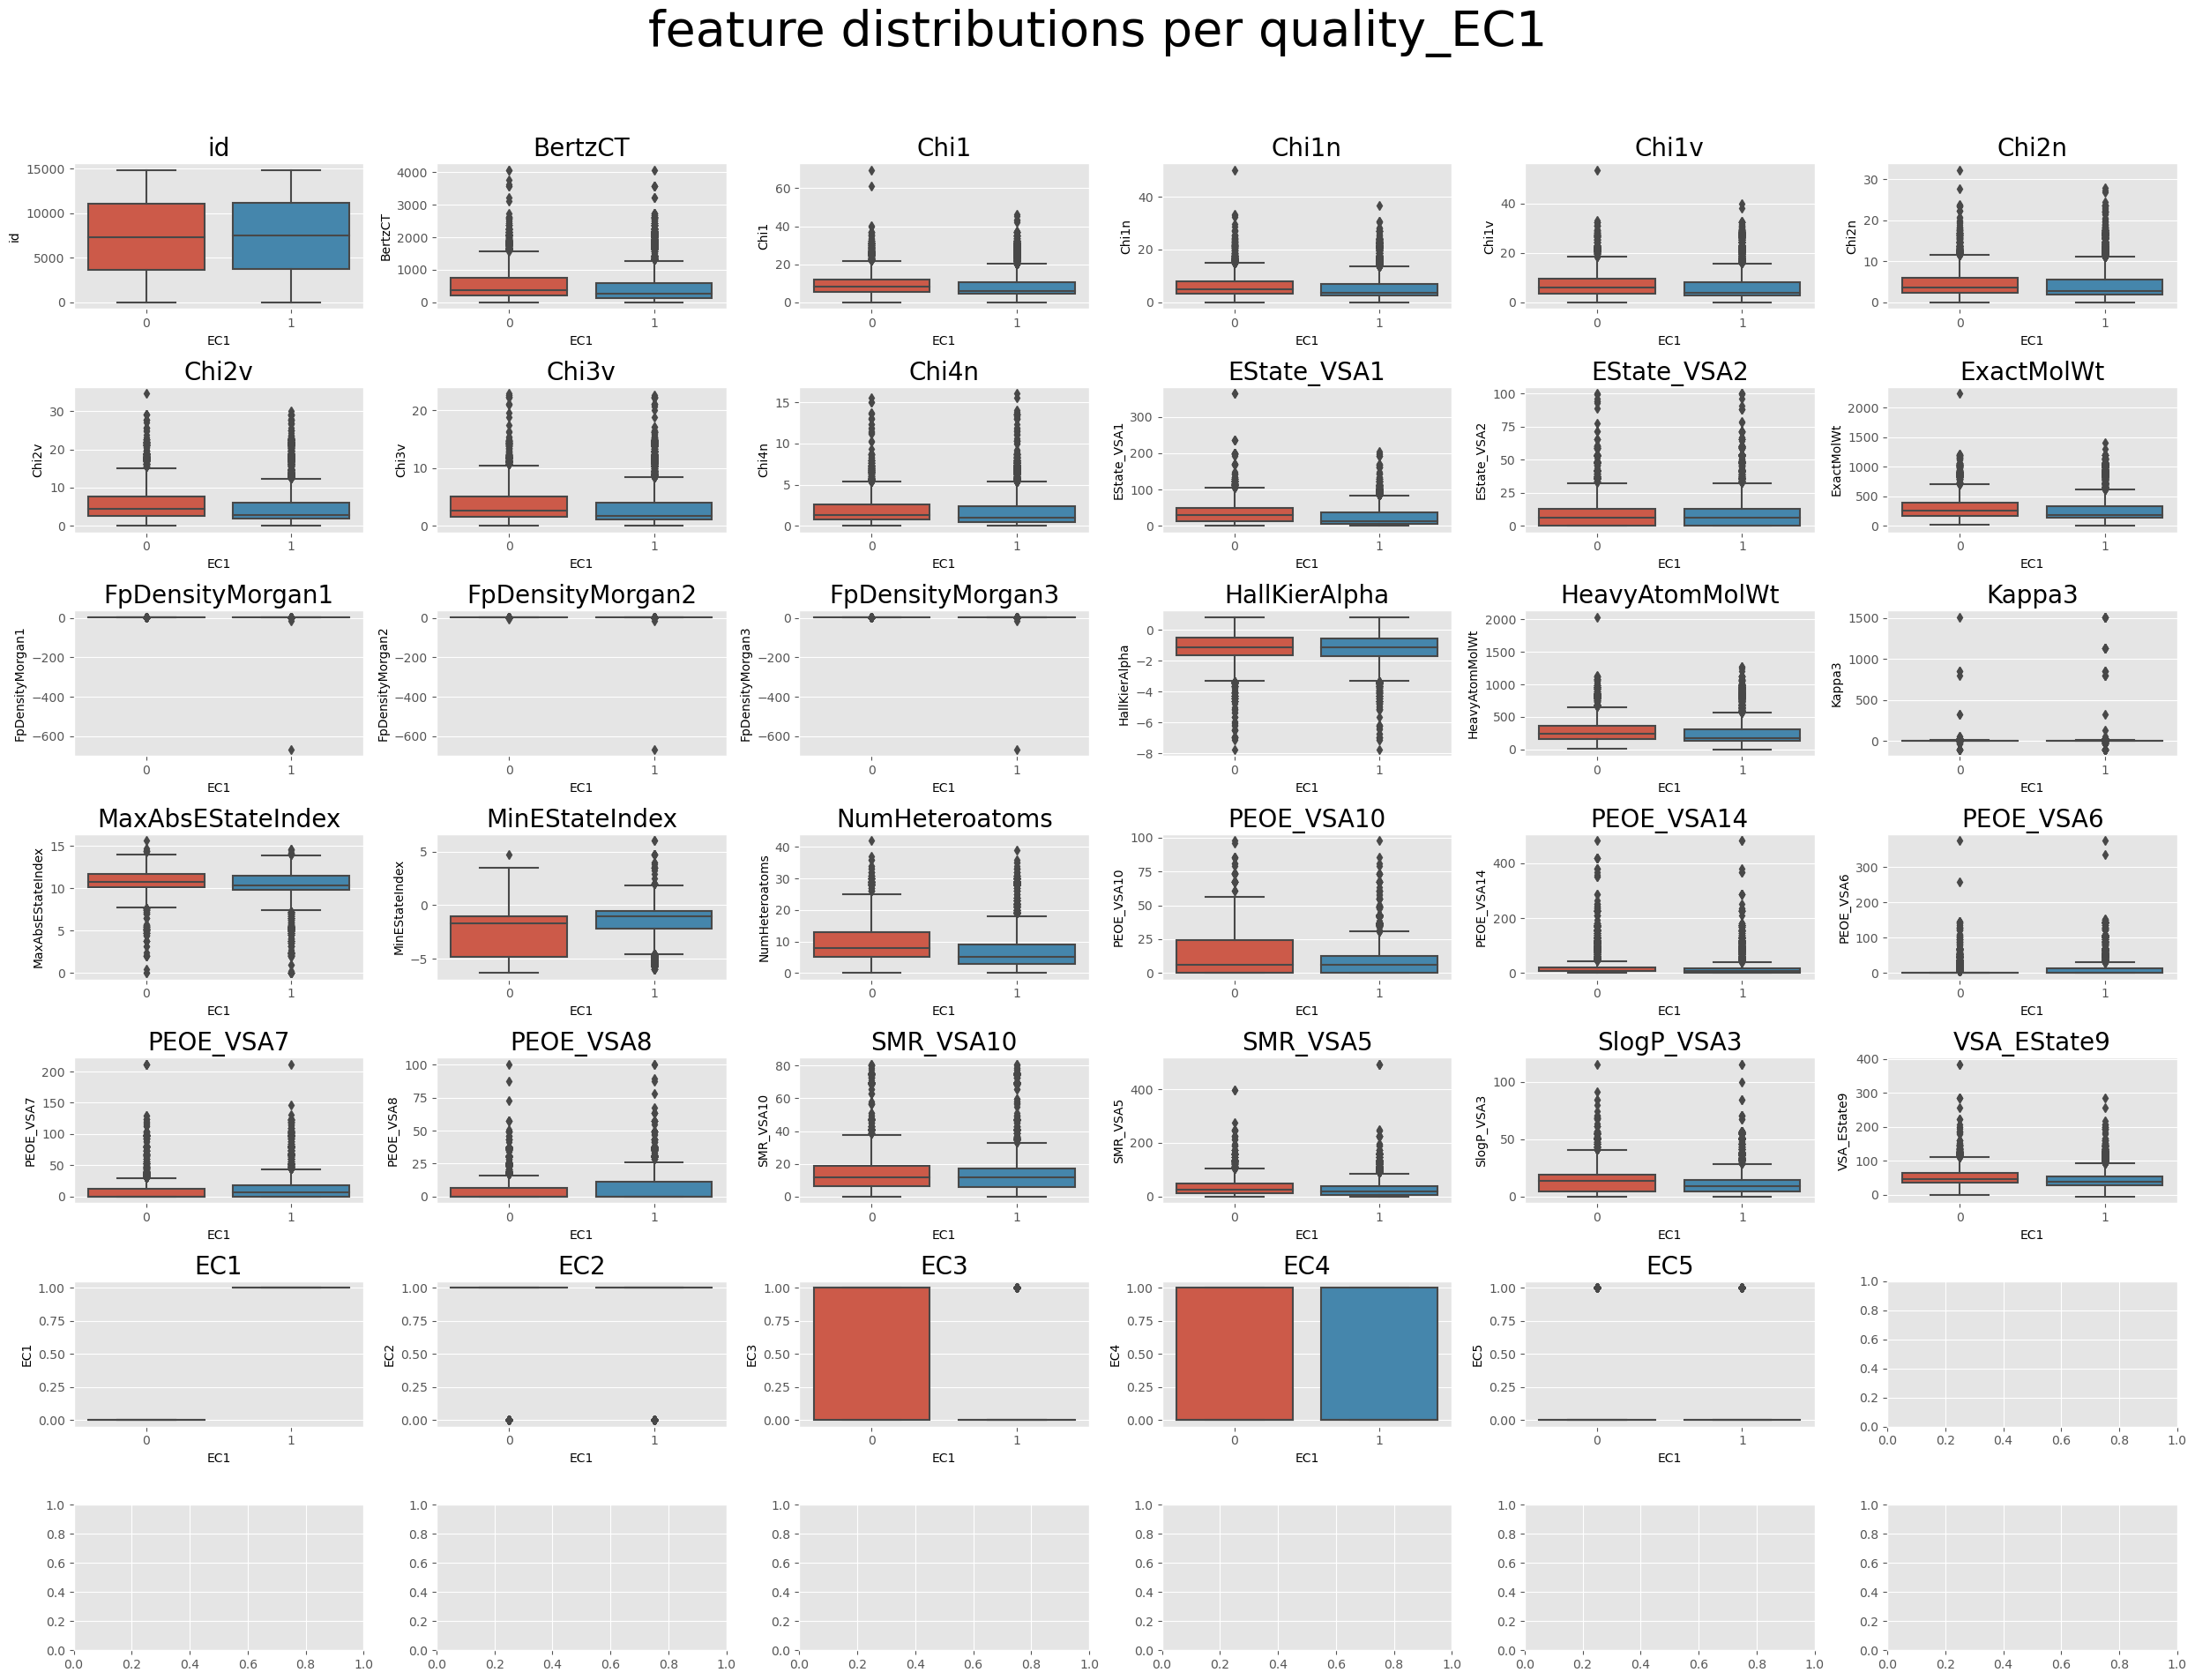

In [113]:
num_data = train_df.drop(['fr_COO','fr_COO2'], axis=1)

fig, axes = plt.subplots(7, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality_EC1', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'EC1', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

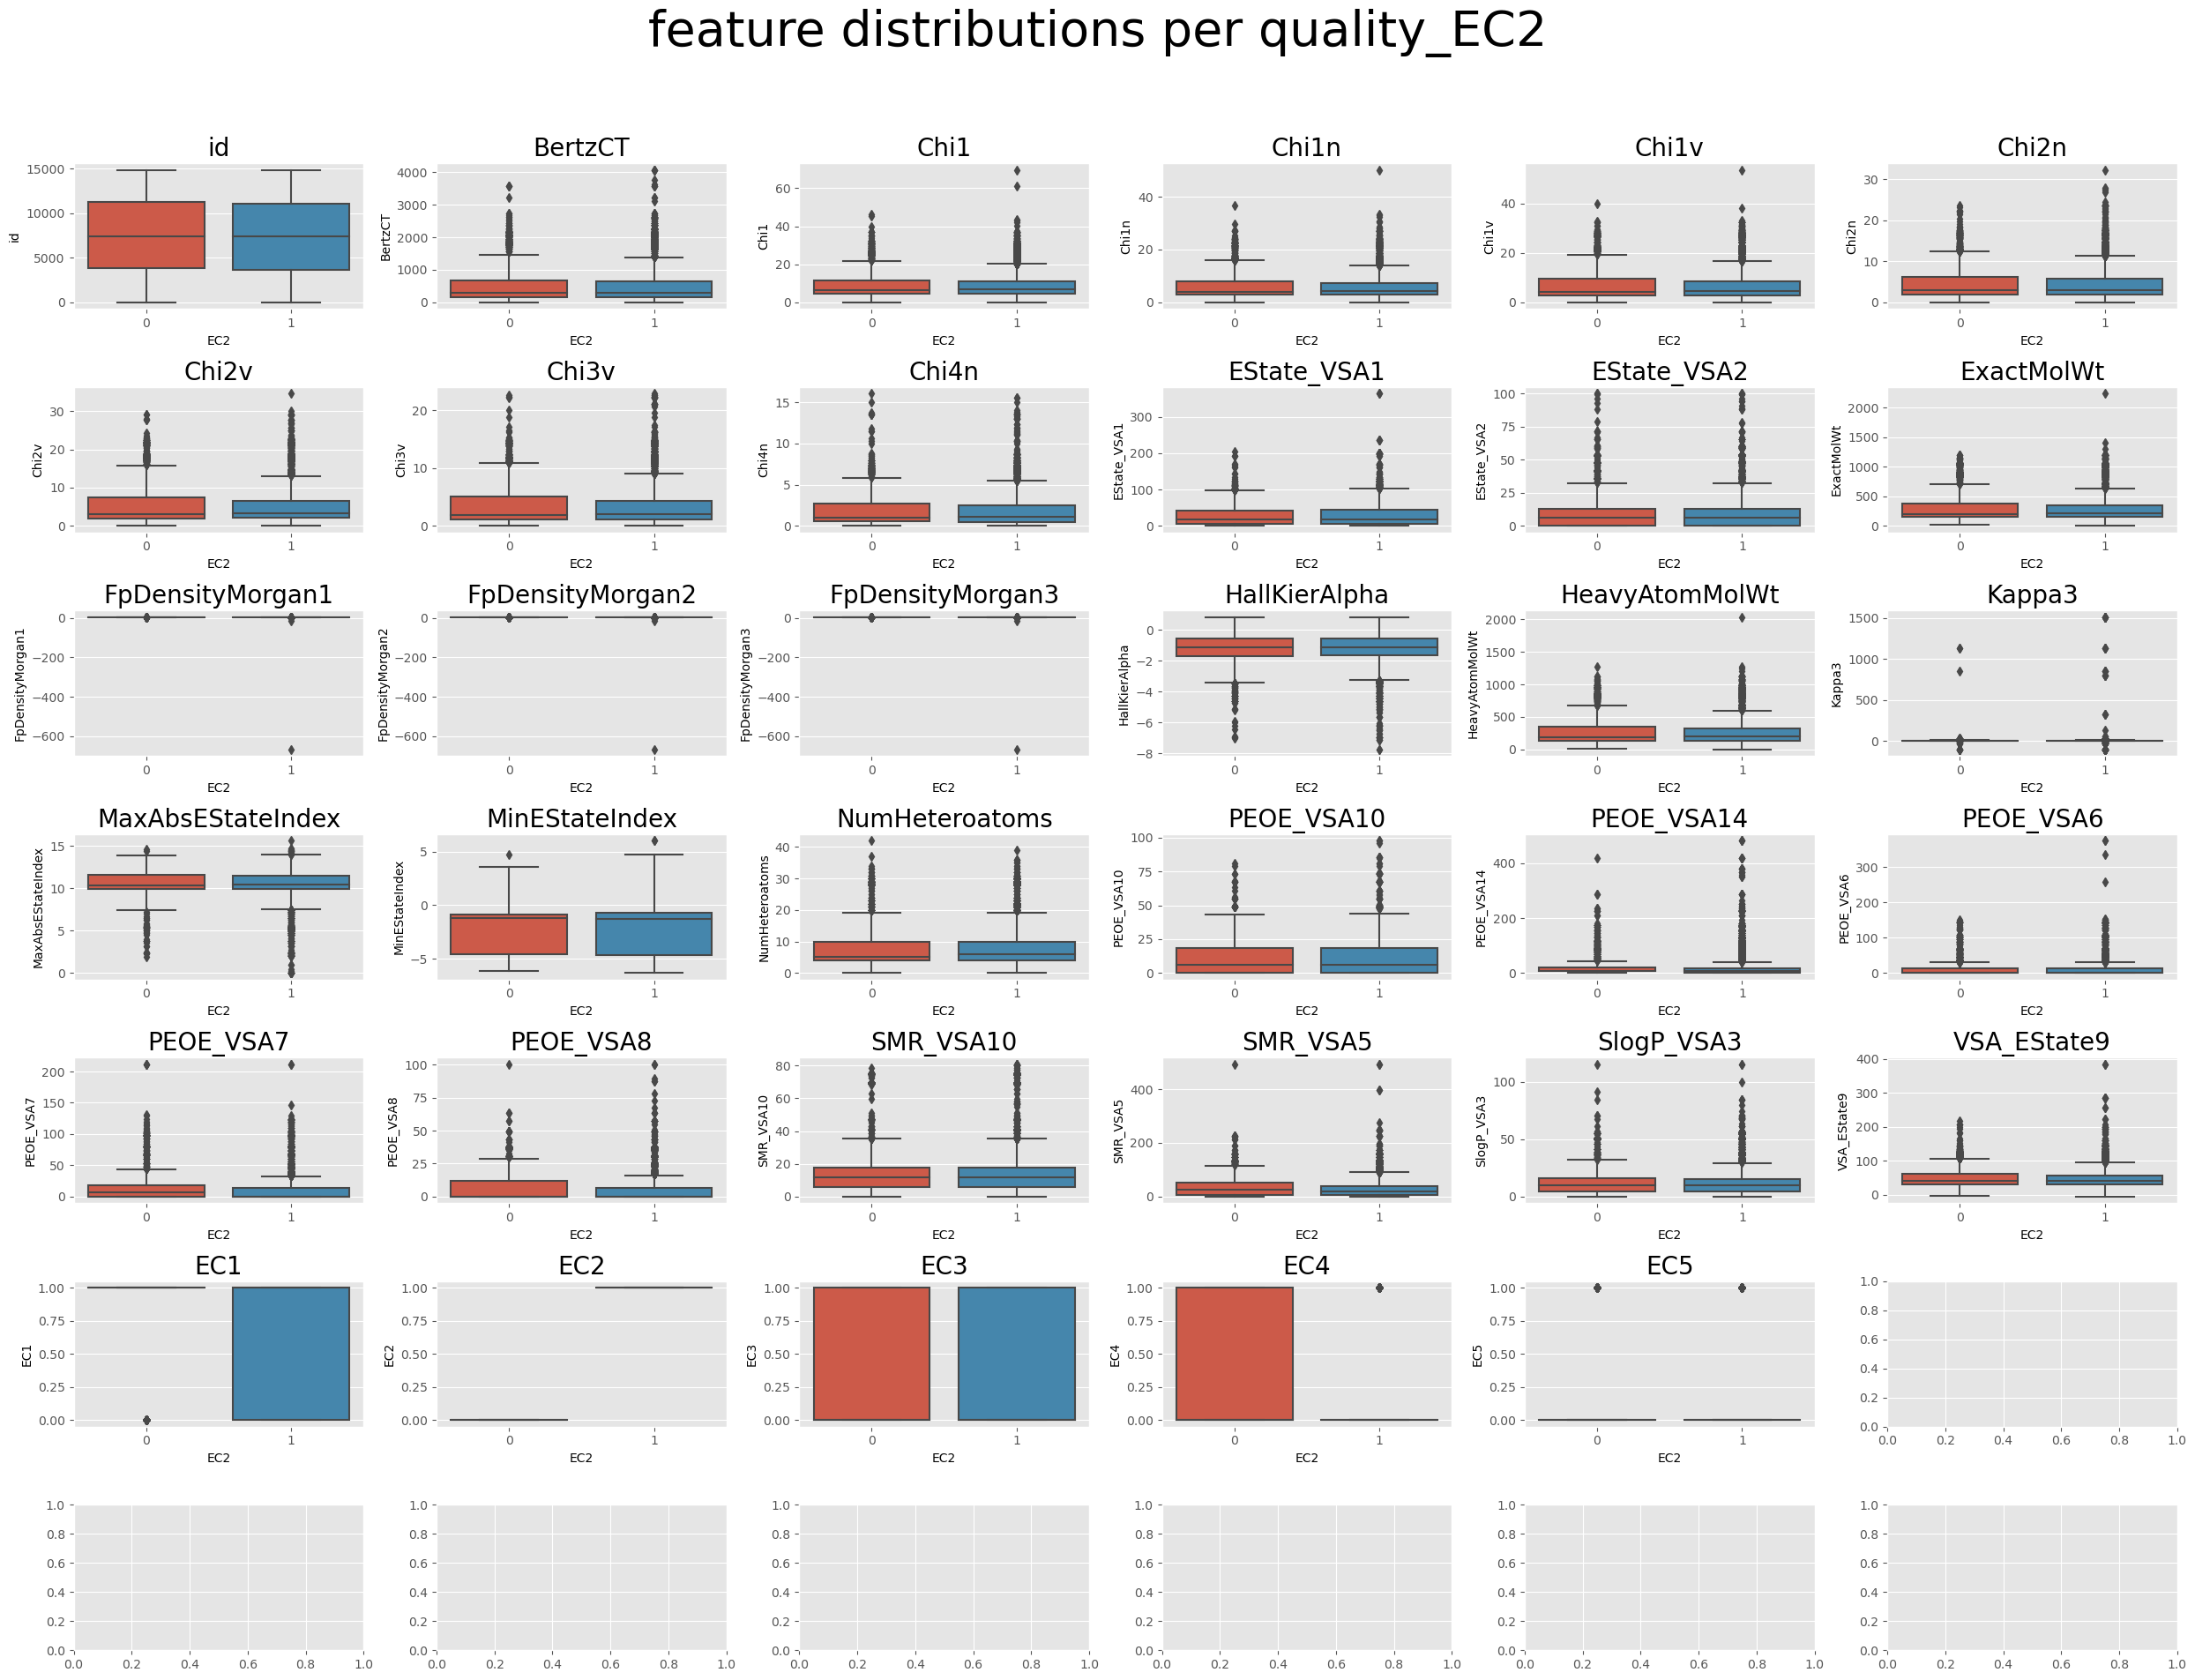

In [114]:
fig, axes = plt.subplots(7, 6, figsize=(25, 20))
fig.suptitle('feature distributions per quality_EC2', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'EC2', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()